Single image reconstruction using autoencoders.


https://youtu.be/kpnGB6Y89OY

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model


In [ ]:
SIZE=256

In [ ]:
img=cv2.imread('Mona_Lisa.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.imread('/virat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
print(img.shape)

(256, 256, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 256, 256, 3)


In [ ]:
img_array = img_array.astype('float32') / 255.


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 256)      

In [ ]:
model.fit(img_array, img_array, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0840 - accuracy: 0.4780
Epoch 2/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0780 - accuracy: 0.4835
Epoch 3/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0760 - accuracy: 0.4828
Epoch 4/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0733 - accuracy: 0.4830
Epoch 5/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0678 - accuracy: 0.4835
Epoch 6/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0626 - accuracy: 0.4847
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0580 - accuracy: 0.7184
Epoch 8/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0557 - accuracy: 0.6929
Epoch 9/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0527 - accuracy: 0.6974
Epoch 10/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0486 - accuracy: 0.6880
Epoch 11/10

In [ ]:
pred = model.predict(img_array)



1/1 [==============================] - 0s 146ms/step


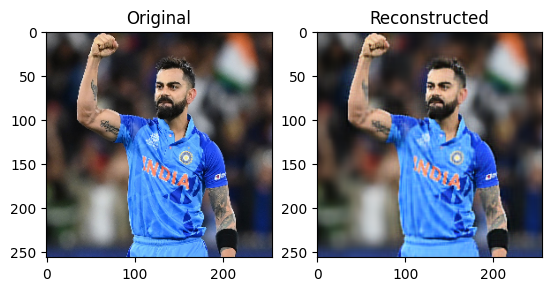

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.title('Reconstructed')
plt.show()